In [73]:
import matplotlib.pyplot as plt
import skimage
import os
from PIL import Image
import numpy as np

In [74]:
data_dir = '../data'  

jellyfish_dict = {}

for class_name in os.listdir(data_dir):
    if class_name=='Train_Test_Valid':
        continue
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = []
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            try:
                img = Image.open(file_path).convert('RGB') 
                img_array = np.array(img) 
                images.append(img_array)
            except Exception as e:
                print(f"Błąd przy wczytywaniu {file_path}: {e}")
        jellyfish_dict[class_name] = images

for label, imgs in jellyfish_dict.items():
    print(f"{label}: {len(imgs)} images")

barrel_jellyfish: 150 images
blue_jellyfish: 150 images
compass_jellyfish: 150 images
lions_mane_jellyfish: 150 images
mauve_stinger_jellyfish: 150 images
Moon_jellyfish: 150 images


In [75]:
def plot_histograms(class_name, images):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes = axes.ravel()
    axes[0].set_title('Red Histogram')
    axes[1].set_title('Green Histogram')
    axes[2].set_title('Blue Histogram')

    r_values = np.concatenate([img[:, :, 0].ravel() for img in images])
    g_values = np.concatenate([img[:, :, 1].ravel() for img in images])
    b_values = np.concatenate([img[:, :, 2].ravel() for img in images])

    axes[0].hist(r_values, bins=256, color='red')
    axes[1].hist(g_values, bins=256, color='green')
    axes[2].hist(b_values, bins=256, color='blue')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.suptitle(f"RGB Histograms for category: {class_name}", fontsize=16)
    plt.show()

In [76]:
def plot_gray_histograms(class_name, images):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f'Gray Histogram for Category: {class_name}')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

    all_pixels = np.concatenate([skimage.color.rgb2gray(img).ravel()*255 for img in images])

    ax.hist(all_pixels, bins=256, color='gray')

    plt.tight_layout()

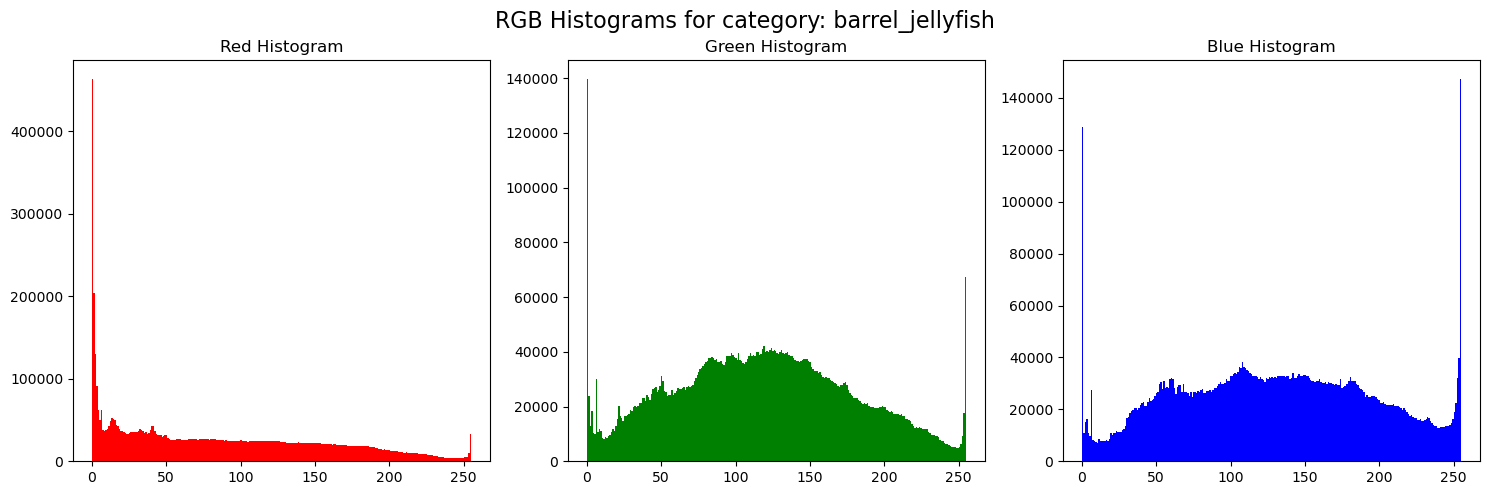

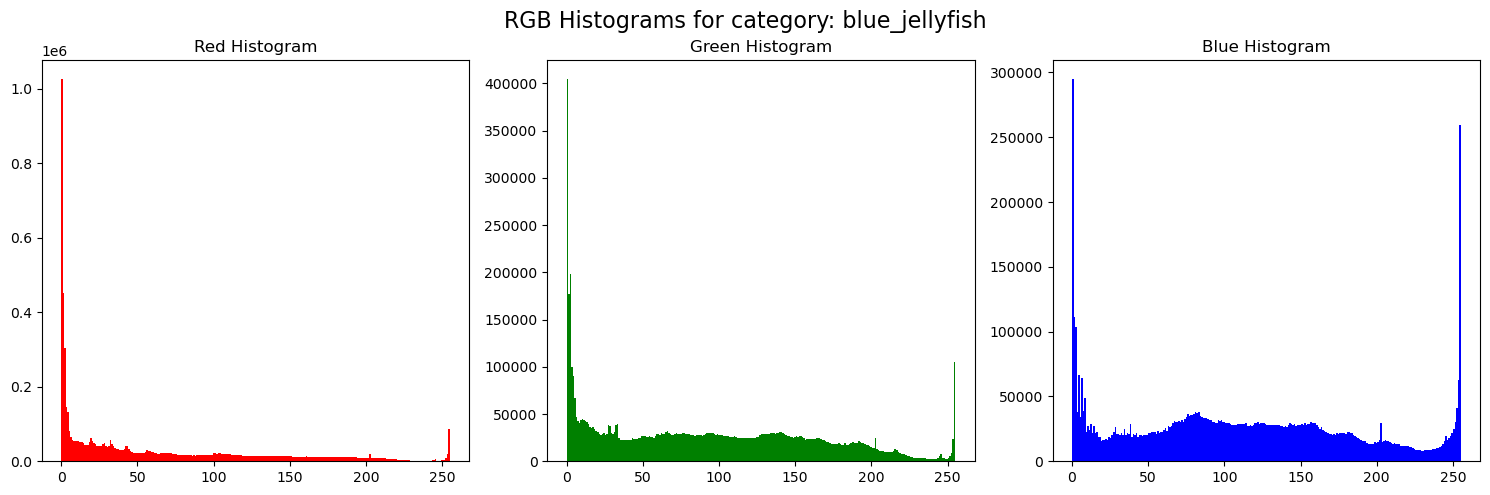

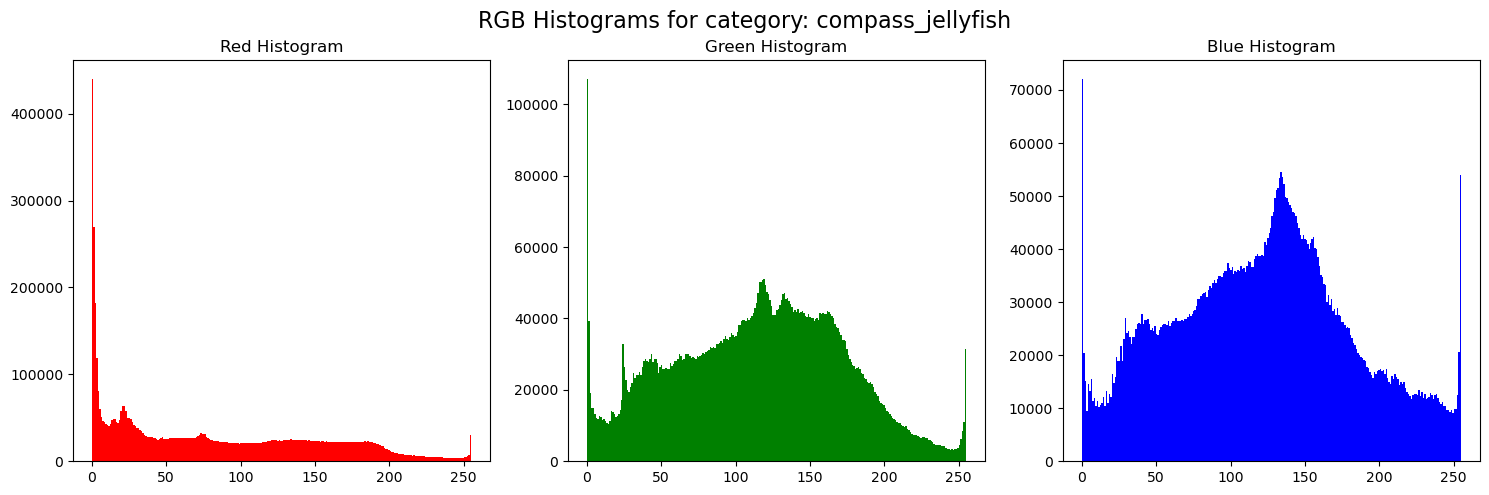

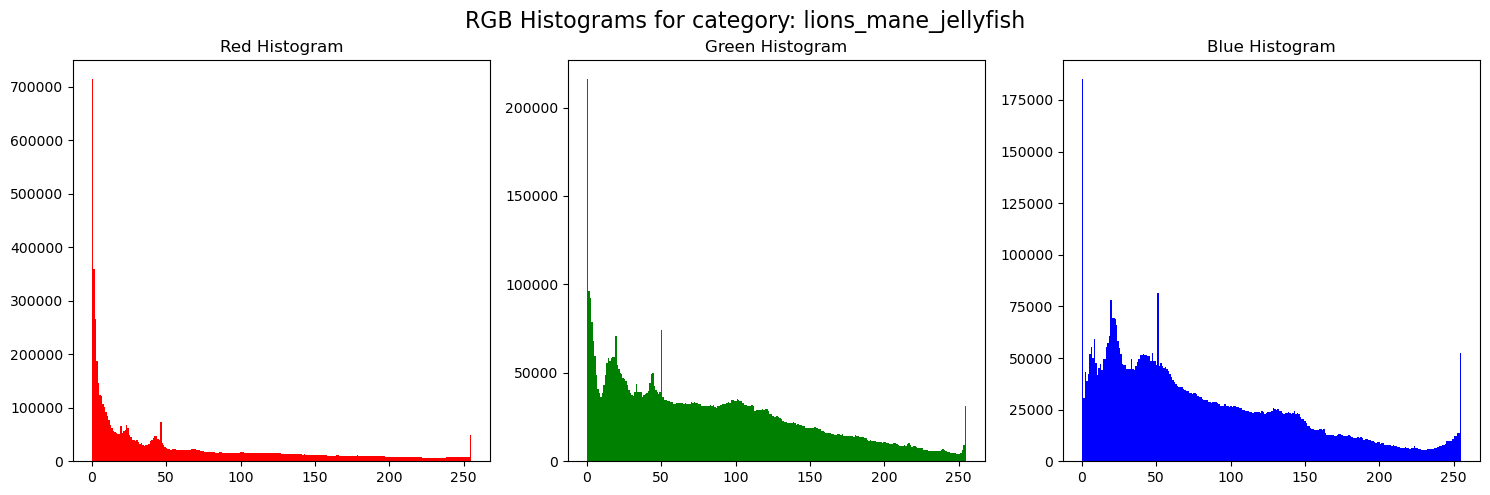

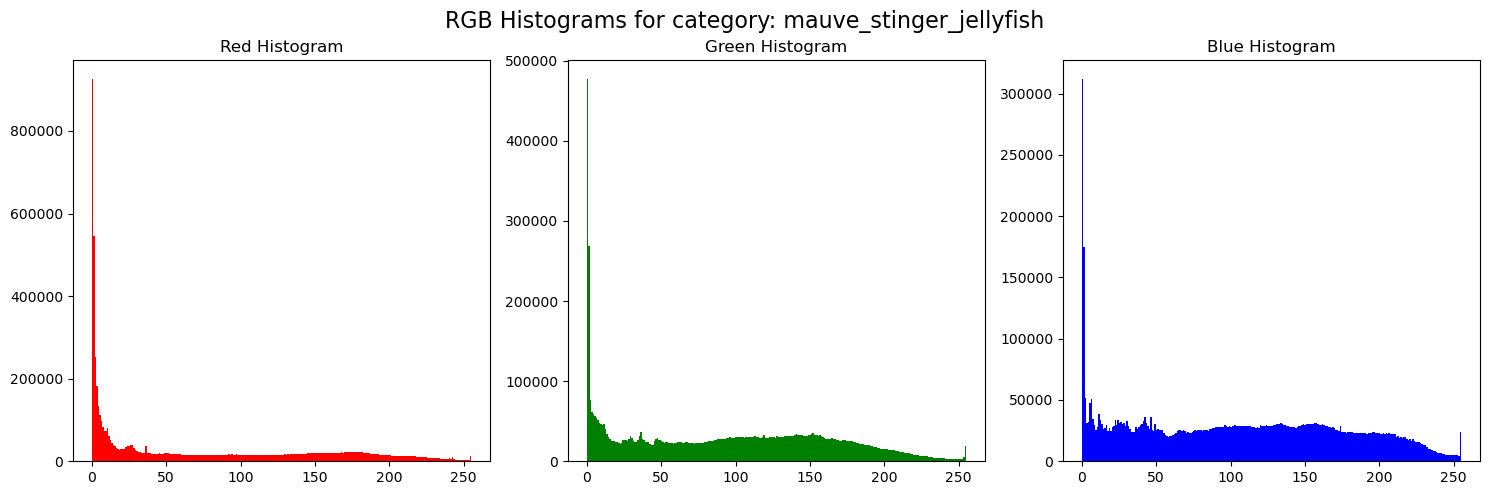

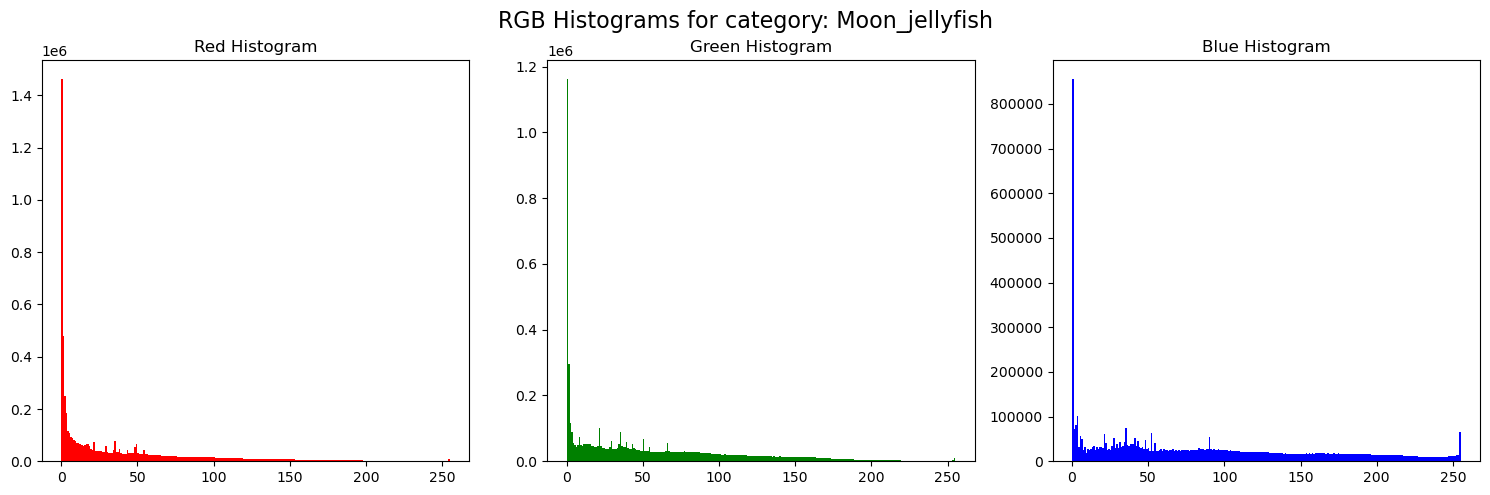

In [77]:
for class_name, images in jellyfish_dict.items():
    plot_histograms(class_name, images)

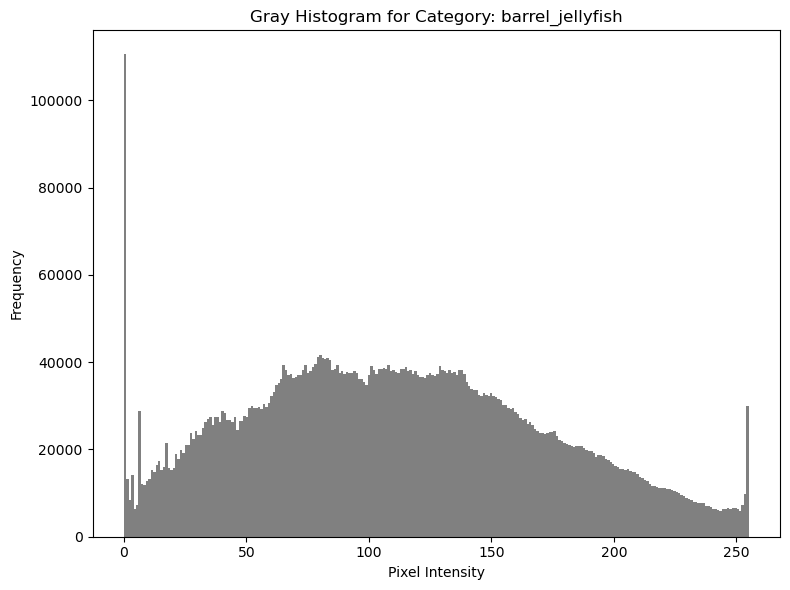

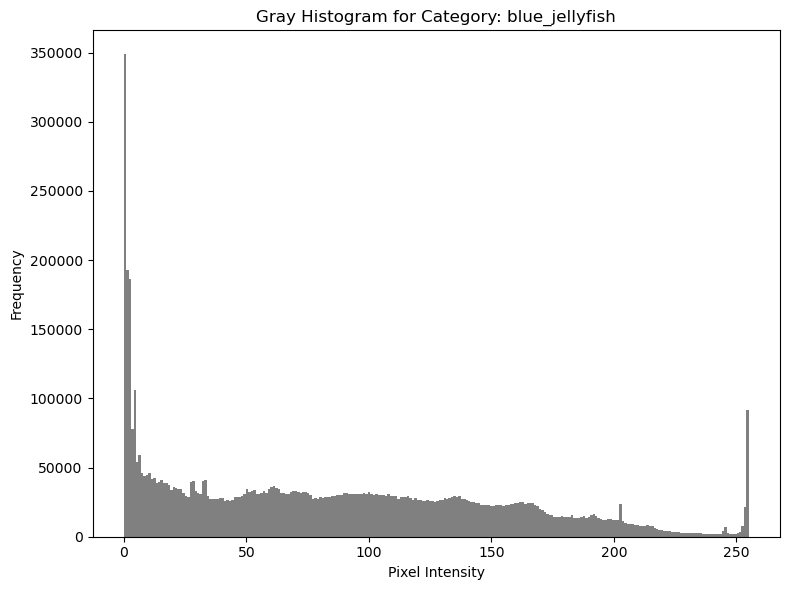

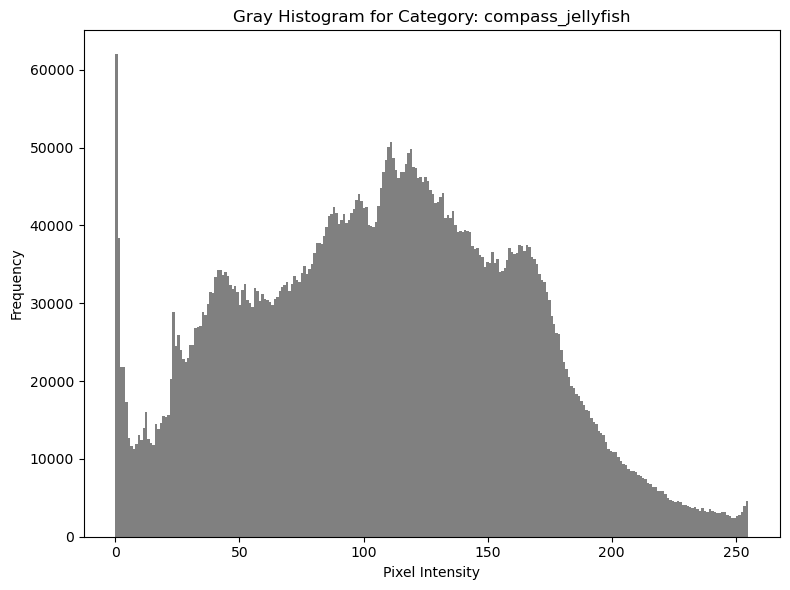

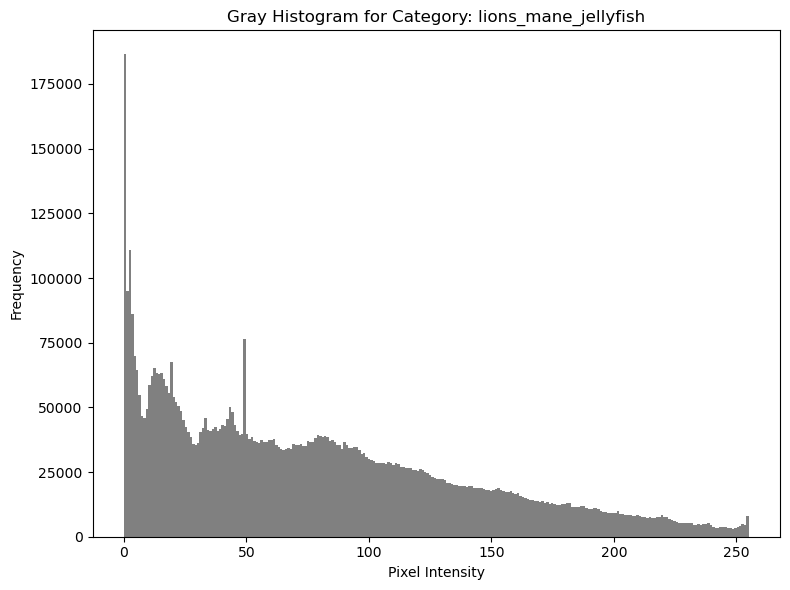

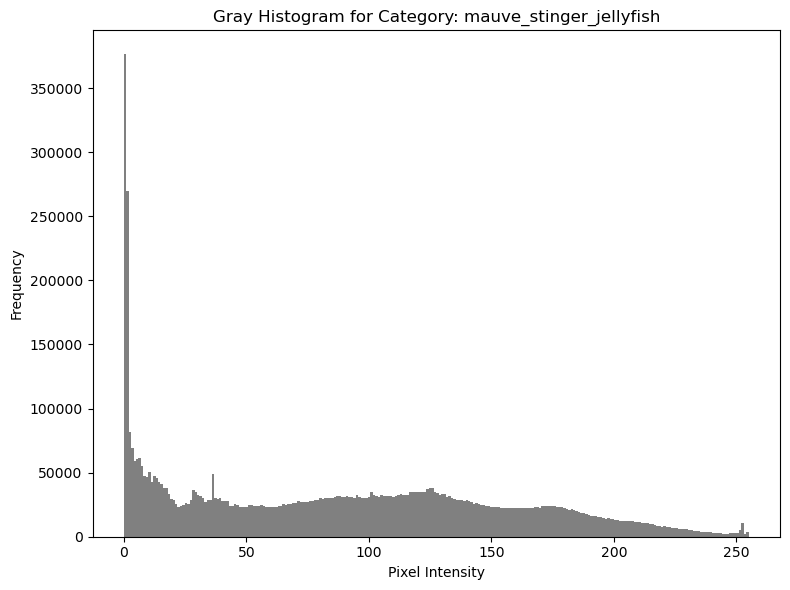

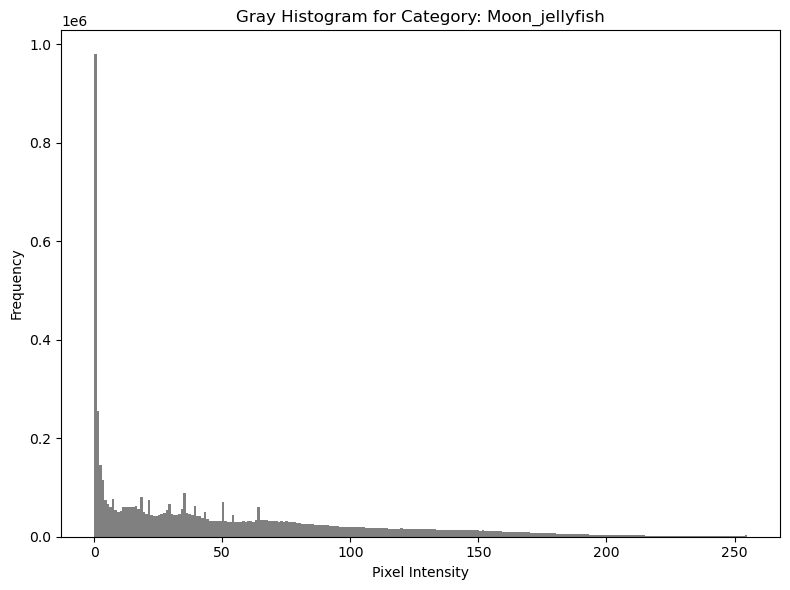

In [78]:
for class_name, images in jellyfish_dict.items():
    plot_gray_histograms(class_name, images)